# Identificação

**Aluno 1: Bruno Henrique de Carvalho Scaglione**           **NUSP: 10335812**

**Turma de Laboratório: 2 **

**Professor: Newton **


# 1- Roteiro

Nessa segunda aula prática vamos introduzir a utilização da Linguagem Python para o projeto de sistemas
de controle utilizando o método do lugar das raízes visando atender a requisitos de desempenho.

Os seguintes temas serão abordados:
- Projeto de um sistema de controle de posição utilizando controlador proporcional,
- Projeto de um sistema de controle de velocidade utilizando controlador proporcional integral,
- Projeto de um sistema de controle de posição utilizando controlador proporcional derivativo.

# 2- Introdução

A Figura 1 abaixo ilustra um sistema standard de controle em malha fechada com realimentação
unitária.
StandardBlock.png
<img src="/nbextensions/google.colab/Figuras/StandardBlock.png" width="60%" height="60%"/>

Sabemos que para esse sistema os pólos são as raízes da equação característica:
$$
1+G(s)H(s)=0.
$$

Usualmente o método é realizado em função de um único parâmetro $K_p \in \mathbb{R}^+$.
É conveniente que $K_p$ seja a constante proporcional $K_p$ do controlador PID.

Fatora-se nesse caso a constante $K_p$ do controlador $H(s)$. A equação característica pode ser
escrita da seguinte forma:
$$
1 + K_p G(s)H(s)=0.
$$

O biblioteca Control Systems da Linguagem Python possui a função rlocus() que calcula e constrói o gráfico do lugar das raízes.
O método de solução utilizado consiste em discretizar o valor de $0 < K_p <\infty$ e estimar para cada valor de $K_p$ os pólos da equação característica.

# 3- Funções de transferência

Na Experiência 1 foram definidos o sistema de controle de velocidade (Figura 2)
e o sistema de controle de posição (Figura 3) da antena parabólica.

<img src="./Figuras/diagblocoVelocidadeDashed.png" width="70%" height="70%"/>

<img src="./Figuras/diagblocoPosicaoDashed.png" width="70%" height="70%"/>

Os parâmetros do sistema estão definidos na Tabela abaixo:

| Parâmetro | Valor |
|:--|:--|
|$K_{pot}$ | 0.318 |
|$K_{tac}$ | 0.48 |
|$K_1$     | 100 |
|$a$       | 100 |
|$K_m$     | 2.083 |
|$a_m$     | 1.71 |
|$K_g$     | 0.1 |
        
Para o sistema de de controle de velocidade o controlador é escrito através da seguinte forma geral:
$$
H_\omega(s)=K_{tac}H_1(s).
$$
onde $H_1(s)$ pode ser uma constante $K$ como ilustrado na Figura 2 mas
nessa experiência nos interessa a utilização de controladores PID e seus variantes:

|-|Tipo|
|---|---|
|$$H_1(s) = K_p$$ | Controlador P |
|$$H_1(s) = K_p \left( 1 + \frac{1}{T_is} \right)$$ | Controlador PI |
|$$H_1(s) = K_p \left( 1 + T_d s \right)$$ | Controlador PD |
|$$H_1(s) = K_p \left( 1 + T_d\frac{s}{\frac{T_d}{N}s+1} \right)$$ | Controlador PD com Filtro |
|$$H_1(s) = K_p \left( 1 + \frac{1}{T_is}+T_d s \right)$$ | Controlador PID |
|$$H_1(s) = K_p\left( 1 + \frac{1}{T_is}+T_d\frac{s}{\frac{T_d}{N}s+1} \right)$$ | Controlador PID com Filtro |

A planta pode ser escrita como:
$$
\frac{\Omega_o(s)}{V_p(s)}=G_\omega(s)=\frac{K_1 K_m K_g}{(s+a)(s+a_m)}
$$

O método do lugar das raízes tem sua solução descrita em função de um único parâmetro multiplicativo.
É conveniente dessa forma que esse parâmetro seja a constante proporcional $K_p$.
A malha aberta deve então ser fatorada da seguinte forma:
$$
K_p GH_{\omega}(s).
$$

O lugar das raízes pode então ser definido como o lugar geométrico definido por todas as raízes
da seguinte equação:
$$
1 + K_p GH_{\omega}(s)=0.
$$

Se por exemplo o controlador $H_1(s)$ for escolhido como um controlador PID com filtro da parte derivativa
obtêm-se:
$$
GH_{\omega}(s)= K_{tac} \left( 1 + \frac{1}{T_is}+T_d\frac{s}{\frac{T_d}{N}s+1} \right) \frac{K_1 K_m K_g}{(s+a)(s+a_m)}.
$$
Os parâmetros do controlador, tempo integral $T_i$, tempo derivativo $T_s$ e parâmetro do filtro $N$
devem ser escolhidos a priori.

Da mesma forma para o sistema de controle de posição  obtêm-se
$$
GH_{\theta}(s)= K_{pot} \left( 1 + \frac{1}{T_is}+T_d\frac{s}{\frac{T_d}{N}s+1} \right)
	\frac{K_1 K_m K_g}{s(s+a)(s+a_m)}.
$$

# OBSERVAÇÕES:

- Os ítens 4, 5 e 6 contêm as especificações de projetos de sistemas de controle e o questionário que você deve responder. Para cada ítem existem dois scripts que devem ser utilizados:

1-) O primeiro script gera um gráfico do lugar das raízes interativo, i.e., você pode clicar com o mouse um ponto do gráfico e o programa imprime o valor de $K_p$ e os pólos correspondentes.

2-) No segundo script insere-se o valor dos parâmetros do controlador e o script calcula todas as informações de malha aberta e fechada além de gerar o gráfico da resposta transitória para entrada degrau.

- Os scripts se encontram após o final do questionário de cada um dos ítens.

- As figuras geradas pelos scripts devem ser salvas no formato *.png e colocadas num diretorio que você deve crar para essa finalidade.
  
- Nos ítens onde é necessário inserir uma figura, utilizar o seguinte caminho no Menu: (Edit) - (Insert Image).

- A função stepinfo() eventualmente pode apresentar erro de execução para o caso da estimação das características da resposta do esforço de controle ($v_p(t)$). Somente nos interessa estimar o valor máximo de $v_p(t)$. Caso ocorra um erro de execução, realize os seguintes passos:
   - comentar a linha referente a função stepinfo();
   - o programa continua a execução do cálculo da resposta a degrau, função step();
   - Estimar o valor máximo de $v_p(t)$ através do gráfico gerado.
   
- Você deve submeter o seu relatório num único arquivo compactado contendo o seu arquivo formato jupyter notebook .ipynb e o diretório contendo todas as figuras do seu relatório.

- Para a geração do gráfico do lugar das raízes com comportamento interativo utiliza-se o comando
  !matplotlib
  Entretando ocorre eventualmente uma falha e o gráfico é gerado inline sem interação. Nesse caso você deve resetar o kernel e o espaço das variáveis. Siga o caminho no Menu: (Kernel) - (Restart & Clear Output)


# 4- Controlador Proporcional - sistema de controle de posição

Projete um controlador proporcional $H(s)=K_p$ para o sistema de controle de posição
da antena parabólica que atenda aos seguintes requisitos:

- Erro estático nulo para uma entrada degrau unitário $\theta_{e_{ss}}=0$,
- Tempo de subida $t_r < 1.5s$,
- Tempo de assentamento $t_s < 5s$,
- Máximo sobresinal $M_p < 10\%$.

a-) Esboce o Lugar Geométrico dos pólos no plano complexo $s$ que satisfazem
		      os requisitos do regime transitório.


<img src="ex4a.png" width="40%" height="40%"/>    


b-) Identifique os pólos da malha aberta $GH_\theta(s)$.


 
| pólo 1 | pólo 2 | pólo 3 |
| :- | :- | :- |
|   -100  |   -1.71   |   0   |
 
c-) Escreva a função de transferência do sistema em malha aberta com valores numéricos:

  
   $$
   GH_p(s)=\frac{198.7}{1s^3 + 101.71s^2 + 171s}
   $$	

d-) Utilizando o método do lugar das raízes projete o valor do ganho $K_p$ tal que o sistema de controle em malha fechada atenda aos requisitos. Utilize os scripts acima.
 
 $$K_p=30$$  	  		  
 
e-) Gráfico do Lugar das Raízes evidenciando os pólos escolhidos:

<img src="ex4_LR.png" width="40%" height="40%"/>
		
f-) Identifique os pólos de malha fechada para o valor de $K_p$ escolhido:
 
| pólo 1 | pólo 2 | pólo 3 |
| :- | :- | :- |
|  -100.0202093   |   -0.84489535+1.12824303j   |   -0.84489535-1.12824303j   | 


g-) Escreva a função de transferência em malha fechada do sistema com valores numéricos:


   $$
   \frac{GH_p(s)}{1+GH_p(s)}= \frac{198.7}{1s^3 + 101.7s^2 + 171s + 198.7}
   $$	  	


h-) Gráfico da resposta transitória para uma entrada do tipo degrau unitário.

<img src="ex4_Resp_Transitoria.png" width="40%" height="40%"/>

i-) Anote na tabela abaixo os valores obtidos para o tempo de subida $t_r$, tempo de acomodação $t_s$, Máximo sobresinal $M_p$ da variável $\omega_o(t)$ (saída do sistema) e $\max v_p(t)$ (Valor máximo da saída do controlador $v_p(t)$):


| $t_r$ | $t_s$ | $M_p$ | $$\max v_p(t)$$ |
|:-|:-|:-|:-|
| 1.32 | 4.21 |  9.41753429513659 | 9.54 |


j-) Considerando os pólos de malha fechada escolhidos analise a contribuição de cada pólo para
    o tempo de acomodação do sistema $t_s$. Há uma relação de dominância de um pólo em relação aos outros ?
 
**O par de pólos complexos -0.84489535+1.12824303j	-0.84489535-1.12824303j contribui com um modo de resposta mais lento, e consequentemente para um tempo de assentamento maior, pois está mais perto do eixo imaginário. Em relação à dominância, como par de polos complexos está mais que 5 vezes mais perto do eixo imaginário que o pólo -100.0202093, esse par é dominante na resposta do sistema** 


l-) Analise a estabilidade do sistema de controle de malha fechada
	          em função do valor $K_p$.
              
**O sistema se torna instável para Kp maior que 87.2 aproximadamente. Pois o pólo passa a entrar no semiplano direito do plano s**              


In [0]:
!pip install control

In [0]:
%matplotlib


Using matplotlib backend: agg


# Script para o ítem 4: Controlador P - Controle de posição - Lugar das Raízes

In [0]:
import numpy as np
import control as co_general
import matplotlib.pyplot as plt
import control.matlab as co
# Escolher essa opcao para o plot interativo do LR em janela fora do notebook
# Opcao para plot interativo dentro do notebook (mais dificil controlar o zoom)
# %matplotlib notebook 
# Lugar das raizes sem interacao
# %matplotlib inline         

# Fecha todas as janelas
plt.close('all')
#
# Controle da posicao angular do motor eletrico CC
# Testes com controle PID
#
# Definicao dos valores dos parametros do sistema
#
# Constante do potenciometro
Kpot = 0.318;
# Parametros da funcao de transferencia Gp(s)
K1 = 100;
Km = 2.083;
Kg = 0.1;
a  = 100;
am = 1.71;
#
# Funcao de transferencia da posicao angular do sistema
s = co.tf('s');
Gp = (K1*Km*Kg)/(s*(s+a)*(s+am))
# Polos e zeros de Gtheta(s)
print('Polos da planta Gtheta(s) = ', co.pole(Gp))
print('Zeros da planta Gtheta(s) = ', co.zero(Gp))
# Definicao do controlador P
H1 = 1 # Kp inicialmente vale 1 pois era selecionado pelo LR
Hp = Kpot*H1
# Funcao de Transferencia de Malha Aberta
GHp=Gp*Hp
[rlist,klist]=co.rlocus(GHp,Plot=True,grid=True)

# Script para o ítem 4: Controlador P - Controle de posição - Resumo do Projeto

Escolhido o valor de $K_p$, através do lugar das Raízes, prossiga executando o script a seguir que calcula todas as grandezas necessárias que caracterizam o projeto 

In [0]:
# Python packages
import numpy as np
import control as co_general
import control.matlab as co
import matplotlib.pyplot as plt
%matplotlib 
#
# Controle da posicao angular do motor eletrico CC
# Controle de Posicao Angular com controlador PID
#
# Definicao dos valores dos parametros do sistema
# Constante do potenciometro
Kpot = 0.318;
# Parametros da funcao de transferencia Gp(s)
K1 = 100;
Km = 2.083;
Kg = 0.1;
a  = 100;
am = 1.71;
# Funcao de transferencia da posicao angular do sistema Gp(s)
# Definicao de s como funcao de transferencia
s = co.tf('s');
Gp = (K1*Km*Kg)/(s*(s+a)*(s+am))
print('-------------')
print('FT da planta Gp(s) = ')
print(Gp)
# Setar o ganho obtido pelo LR
Kp = 30
# Controlador Proporcional
H1 = Kp
# Controlador Hp(s)
Hp = Kpot*H1
# Malha aberta
GHp=Gp*Hp
print('-------------')
print('FT DE MALHA ABERTA GHp(s)=Gp(s)*Hp(s) = ')
print(GHp)
print('-------------')
print('POLOS E ZEROS DE MALHA ABERTA')
print('Polos de GHp(s) = ', co.pole(GHp))
print('Zeros de GHp(s) = ', co.zero(GHp))
#co.pzmap(GHp,grid=True,title='PZMAP malha aberta')
# Funcao de transferencia em malha fechada
cloop = co.feedback(GHp,1)
print('-------------')
print('FT DE MALHA FECHADA GHw(s)/(1+GHw(s))')
print(cloop)
print('-------------')
print('POLOS E ZEROS DE MALHA FECHADA')
print('Polos da planta cloop(s) =  GHp(s)/(1+GHp(s)) = ', co.pole(cloop))
print('Zeros da planta cloop(s) =  GHp(s)/(1+GHp(s)) = ', co.zero(cloop))
#co.pzmap(cloop,grid=True,title='PZMAP malha fechada')
print('-------------')
print('COEF. DE AMORTECIMENTO E FREQ. NATURAL')
print('_____Polos____________zeta_______omegan')
co.damp(cloop)
# Calcula as caracteristicas da resposta transitoria
#  stepinfo(sys, T=None, SettlingTimeThreshold=0.02, RiseTimeLimits=(0.1,0.9))
#  S: a dictionary containing:
#        RiseTime: Time from 10% to 90% of the steady-state value.
#        SettlingTime: Time to enter inside a default error of 2%
#        SettlingMin: Minimum value after RiseTime
#        SettlingMax: Maximum value after RiseTime
#        Overshoot: Percentage of the Peak relative to steady value
#        Undershoot: Percentage of undershoot
#        Peak: Absolute peak value
#        PeakTime: time of the Peak
#        SteadyStateValue: Steady-state value
S=co.stepinfo(cloop)
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA')
print('tempo de subida tr = ','%.2f' % S['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % S['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',S['Overshoot'])
print('valor de pico thetaomax = ','%.2f' % S['Peak'])
print('instante de pico tp = ','%.2f' % S['PeakTime'],'seg')
print('valor de regime estacionario thetaoss = ','%.2f' % S['SteadyStateValue'])
# Grafico da resposta a degrau unitario
plt.figure(3)
thetao, t = co.step(cloop)
plt.plot(t,thetao)
plt.title('Resposta a degrau do sistema em malha fechada')
plt.xlabel('tempo (s)')
plt.ylabel('posicao angular')
plt.grid()
#
# Esforco de controle
#
# Funcao de transferencia para calculo do esforco de controle u(t)
# o sinal u(t) pode ser calculado definindo-se
# um sistema de controle em malha fechada onde H(s)
# esta na malha direta e G(s) na malha de realimentacao
#
# R(s)  E(s)|------|        U(s)
#---->(+)---| H(s) |------------>
#    _ ^    |------|    |
#      |                |
#      |    |------|    |
#      |----| G(s) |<----
#           |------|
# 
'''esforco=co.feedback(Hp,Gp)
print('-------------')
print('FT DO ESFORCO DE CONTROLE Hp(s)/(1+Hp(s)Gp(s))')
print(esforco)
# Caracteristicas da resposta transitória
co.stepinfo(esforco)
# Valor de pico
print('-------------')
print('CARACTERISTICAS DO ESFORCO DE CONTROLE')
print('valor de pico Vpmax = ','%.2f' % SE['Peak'])
plt.figure(4)
Vp, te = co.step(esforco)
plt.plot(te, Vp)
plt.title('Características do esforço de controle')
plt.xlabel('tempo (s)')
plt.ylabel('esforco de controle Vp(t)')
plt.grid()'''
plt.show()

# 5- Controlador proporcional integral - sistema de controle de velocidade

Sabemos que a função de transferência de velocidade da planta não possui um integrador, dessa forma,
a adição de um integrador deve ser feito pelo controlador.

A utilização de um controlador PI é adequado para essa planta:
$$
H_1(s) = K_p\left(1+\frac{1}{T_is}\right)
$$

Projete um controlador PI para o sistema de controle de velocidade da
da antena parabólica que atenda aos seguintes requisitos:
- Erro estático nulo para uma entrada degrau unitário $\omega_{e_{ss}}=0$,
- Tempo de subida $t_r < 1.0$,
- Tempo de assentamento $t_s < 2.0$,
- Máximo sobresinal $M_p < 10\%$.

a-) Esboce o lugar geométrico dos pólos no plano complexo $s$ que satisfazem os requisitos do regime transitório.

<img src="ex5a.png" width="40%" height="40%"/> 
 		
b-) O parâmetro $T_i$ deve ser escolhido a priori. Existem três possíveis posições relativas em relação aos pólos do sistema: (1) Entre $s=0$ e $s=-a_m$, (2) entre $s=-a_m$ e $s=-a_1$ e (3) entre $s=-a_1$ e $s=-\infty$.
		
   A seguir são apresentados o lugar das raízes para três valores diferentes de $T_i$ (os gráficos do lado direito são ampliações em torno da origem do plano $s$):
                
1- $T_i=0.5$:

<table><tr> FigurasVelPI/PiVelTi05_a.png e FigurasVelPI/PiVelTi05_b.png
<td>  <img src="./FigurasVelPI/PiVelTi05_a.png" width="70%" height="70%"/> </td>
<td>  <img src="./FigurasVelPI/PiVelTi05_b.png" width="70%" height="70%"/> </td>
</tr></table>
						
2- $T_i=0.1$:

<table><tr> FigurasVelPI/PiVelTi01_a.png e ./FigurasVelPI/PiVelTi01_b.png
<td>  <img src="./FigurasVelPI/PiVelTi01_a.png" width="70%" height="70%"/> </td>
<td>  <img src="./FigurasVelPI/PiVelTi01_b.png" width="70%" height="70%"/> </td>
</tr></table>

3- $T_i=0.025$:

<table><tr> FigurasVelPI/PiVelTi0025_a.png e ./FigurasVelPI/PiVelTi0025_b.png
<td>  <img src="./FigurasVelPI/PiVelTi0025_a.png" width="70%" height="70%"/> </td>
<td>  <img src="./FigurasVelPI/PiVelTi0025_b.png" width="70%" height="70%"/> </td>
</tr></table>

Realize testes com estes valores de $T_i$ e escolha o valor que achar conveniente para o seu projeto.



$$
T_i=0.5
$$
		
c-) Identifique os pólos e zeros da malha aberta $GH_\theta(s)$:


| pólo 1 | pólo 2 | pólo 3 | zero |
| :- | :- | :- | :- |
|   -100   |   -1.71   |   0   | -2 |


POLOS E ZEROS DE MALHA ABERTA
Polos de GHw(s) =  [-100.     -1.71    0.  ]
Zeros de GHw(s) =  [-2.]

d-) Escreva a função de transferência do sistema em malha aberta com valores numéricos:


  
   $$
   GH_\omega(s)=\frac{99.98s+200}{0.5s^3 + 50.85s^2 + 85.5s}
   $$	  		  
 
e-) Utilizando o método do lugar das raízes projete o valor do ganho $K_p$ tal que o sistema de controle em malha fechada atenda aos requisitos. Utilize o script .m.


   $$
   K_p=20
   $$ 		  		  
 
f-) Gráfico do lugar das raízes evidenciando os pólos escolhidos:

<img src="ex5_LR.png" width="40%" height="40%"/>
		
g-) Identifique os pólos da malha fechada para cada um dos valores de $K_p$:


| pólo 1 | pólo 2 | pólo 3 |
| :- | :- | :- |
|   [-97.96492959  |   -1.87253521+0.75898118j   |   -1.87253521-0.75898118j   |  

h-) Escreva a função de transferência em malha fechada do sistema com valores numéricos:


   $$
   \frac{GH_\omega(s)}{1+GH_\omega(s)}= \frac{99.98s+200}{0.5s^3 + 50.85s^2 + 185.5s + 200}
   $$	  		  
 

i-) Gráfico da resposta transitória para uma entrada do tipo degrau unitário:

<img src="ex5_Resp_Transitoria.png" width="40%" height="40%"/> 
		
j-) Anote na tabela abaixo os valores obtidos para o tempo de subida $t_r$, tempo de acomodação $t_s$, Máximo sobresinal $M_p$ da variável $\omega_o(t)$ e $\max v_p(t)$ (Valor máximo da saída do controlador $v_p(t)$)

 
| $t_r$ | $t_s$ | $M_p$ | $$\max v_p(t)$$ |
|:-|:-|:-|:-|
| 0.91 | 1.44 | 0.43417806871518283 | 9.78 |
		
h-) Analise como a posição do zero de malha aberta $s=-1/T_i$ influencia o regime transitório do sistema.

**Os zeros em geral ponderam a influência dos modos de resposta dos pólos. Neste casocomo o zero em -2 está próximo do pólo em -1.71, o zero atenua bastante a influencia do modo de resposta desse pólo na resposta do sistema. Como na confuguração do controlador PI, o zero fica à eaquerda do pólo, ele atrasando a fase do sistema, e modificando um pouco o Lugar das Raízes. **

[comment]: <> (This is a comment, it will not be included)
		

i-) Considerando os pólos de malha fechada escolhidos analise a contribuição de cada pólo para
    o tempo de acomodação do sistema $t_s$. Há uma relação de dominância de um pólo em relação aos outros ?
 
**O par de pólos complexos -1.87253521+0.75898118j	-1.87253521-0.75898118j contribui com um modo de resposta mais lento, e consequentemente para um tempo de assentamento maior, pois está mais perto do eixo imaginário. Em relação à dominância, como par de polos complexos está mais que 5 vezes mais perto do eixo imaginário que o pólo -97.96492959, esse par é dominante na resposta do sistema**

# Script para o ítem 5: Controlador PI - Controle de Velocidade - Lugar das Raízes

In [0]:
import numpy as np
import control as co_general
import matplotlib.pyplot as plt
import control.matlab as co
# Escolher essa opcao para o plot interativo do LR em janela fora do notebook
%matplotlib
# Opcao para plot interativo dentro do notebook (mais dificil controlar o zoom)
#%matplotlib notebook 
# Lugar das raizes sem interacao
#%matplotlib inline         

# Fecha todas as janelas
plt.close('all')
#
# Controle da posicao velocidade do motor eletrico CC
# Testes com controle PID
#
# Definicao dos valores dos parametros do sistema
#
# Constante do tacometro
Ktac = 0.48;
# Parametros da funcao de transferencia Gw(s)
K1 = 100;
Km = 2.083;
Kg = 0.1;
a  = 100;
am = 1.71;
#
# Funcao de transferencia da velocidade angular do sistema
s = co.tf('s');
Gw = (K1*Km*Kg)/((s+a)*(s+am))
# Polos e zeros de Gtheta(s)
print('Polos da planta Gw(s) = ', co.pole(Gw))
print('Zeros da planta Gw(s) = ', co.zero(Gw))
# Definicao do controlador PI, Inicialmente Kp=1
Ti=0.5
H1 = 1*(1+ 1/(Ti*s))
Hw = Ktac*H1
# Funcao de Transferencia de Malha Aberta
GHw=Gw*Hw
[rlist,klist]=co.rlocus(GHw,Plot=True,grid=True)

# Script para o ítem 5: Controlador PI - Controle de Velocidade - Resumo do Projeto¶

Escolhido o valor de  𝐾𝑝  prossiga executando o script a seguir que calcula todas as grandezas necessárias que caracterizam o projeto

In [0]:
# Python packages
import numpy as np
import control as co_general
import control.matlab as co
import matplotlib.pyplot as plt
%matplotlib inline
#
# Controle da velocidade angular do motor eletrico CC
# Controle de velocidade Angular com controlador PID
#
# Definicao dos valores dos parametros do sistema
# Constante do tacometro
Ktac = 0.48; 
# Parametros da funcao de transferencia Gw(s)
K1 = 100;
Km = 2.083;
Kg = 0.1;
a  = 100;
am = 1.71;
# Funcao de transferencia da velocidade angular do sistema Gw(s)
# Definicao de s como funcao de transferencia
s = co.tf('s');
Gw = (K1*Km*Kg)/((s+a)*(s+am))
print('-------------')
print('FT da planta Gw(s) = ')
print(Gw)
# Setar o ganho obtido pelo LR
Kp = 20
# Definicao do controlador PI
Ti=0.5
H1 = Kp*(1+ 1/(Ti*s))   
# Controlador Hw(s)
Hw = Ktac*H1
# Malha aberta
GHw=Gw*Hw
print('-------------')
print('FT DE MALHA ABERTA GHw(s)=Gw(s)*Hw(s) = ')
print(GHw)
print('-------------')
print('POLOS E ZEROS DE MALHA ABERTA')
print('Polos de GHw(s) = ', co.pole(GHw))
print('Zeros de GHw(s) = ', co.zero(GHw))
# Funcao de transferencia em malha fechada
cloop = co.feedback(GHw,1)
print('-------------')
print('FT DE MALHA FECHADA GHw(s)/(1+GHw(s))')
print(cloop)
print('-------------')
print('POLOS E ZEROS DE MALHA FECHADA')
print('Polos da planta cloop(s) =  GHw(s)/(1+GHw(s)) = ', co.pole(cloop))
print('Zeros da planta cloop(s) =  GHw(s)/(1+GHw(s)) = ', co.zero(cloop))
print('-------------')
print('COEF. DE AMORTECIMENTO E FREQ. NATURAL')
print('_____Polos____________zeta_______omegan')
co.damp(cloop)
# Calcula as caracteristicas da resposta transitoria
#  stepinfo(sys, T=None, SettlingTimeThreshold=0.02, RiseTimeLimits=(0.1,0.9))
#  S: a dictionary containing:
#        RiseTime: Time from 10% to 90% of the steady-state value.
#        SettlingTime: Time to enter inside a default error of 2%
#        SettlingMin: Minimum value after RiseTime
#        SettlingMax: Maximum value after RiseTime
#        Overshoot: Percentage of the Peak relative to steady value
#        Undershoot: Percentage of undershoot
#        Peak: Absolute peak value
#        PeakTime: time of the Peak
#        SteadyStateValue: Steady-state value
S=co.stepinfo(cloop)
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA')
print('tempo de subida tr = ','%.2f' % S['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % S['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',S['Overshoot'])
print('valor de pico thetaomax = ','%.2f' % S['Peak'])
print('instante de pico tp = ','%.2f' % S['PeakTime'],'seg')
print('valor de regime estacionario thetaoss = ','%.2f' % S['SteadyStateValue'])
# Grafico da resposta a degrau unitario
plt.figure(3)
wo, t = co.step(cloop)
plt.plot(t,wo)
plt.title('Resposta a degrau do sistema em malha fechada')
plt.xlabel('tempo (s)')
plt.ylabel('velocidade')
plt.grid()
#
# Esforco de controle
#
# Funcao de transferencia para calculo do esforco de controle u(t)
# o sinal u(t) pode ser calculado definindo-se
# um sistema de controle em malha fechada onde H(s)
# esta na malha direta e G(s) na malha de realimentacao
#
# R(s)  E(s)|------|        U(s)
#---->(+)---| H(s) |------------>
#    _ ^    |------|    |
#      |                |
#      |    |------|    |
#      |----| G(s) |<----
#           |------|
# 
esforco=co.feedback(Hw,Gw)
print('-------------')
print('FT DO ESFORCO DE CONTROLE Hw(s)/(1+Hw(s)Gw(s))')
print(esforco)
# Caracteristicas da resposta transitória
SE=co.stepinfo(esforco)
# Valor de pico
print('-------------')
print('CARACTERISTICAS DO ESFORCO DE CONTROLE')
print('valor de pico Vpmax = ','%.2f' % SE['Peak'])
plt.figure(4)
Vw, te = co.step(esforco)
plt.plot(te, Vw)
plt.title('Características do esforço de controle')
plt.xlabel('tempo (s)')
plt.ylabel('esforco de controle Vp(t)')
plt.grid()
plt.show()

# 6- Controlador PD para o sistema de controle de posição

O controlador PD pode ser escrito da seguinte forma:
$$
H_1(s) = K_p\left(1+T_d\frac{s}{\frac{T_d}{N}s+1}\right),
$$

O filtro de 1a. ordem que é definido como:
\begin{equation}
\frac{1}{\frac{T_d}{N}s+1},
\end{equation}
é necessário para garantir que a parte derivativa seja um sistema causal (grau do polinômio do denominador
igual ou maior que o grau do polinômio do numerador), o que garante a estabilidade numérica da simulação.
Além disso, a componente derivativa gera valores de saída extremamente elevados para entradas rápidas, por exemplo, do tipo degrau (Para uma entrada degrau a derivada é infinita) ou ruídos de alta frequência.
Quanto menor o valor de $N$ menor a frequência de corte do filtro.

O controlador PD não possui obviamente integrador mas a planta possui um integrador
o que garante que o
erro estático $\theta_{e_{ss}}$ para uma entrada degrau possa ser feito nulo.

Projete um controlador PD para o sistema de controle de posição da
da antena parabólica que atenda aos seguintes requisitos:
- Erro estático nulo para uma entrada degrau unitário $\theta_{e_{ss}}=0$,
- Tempo de subida $t_r < 1.0s$,
- Tempo de assentamento $t_s < 5s$,
- Máximo sobresinal $M_p < 10\%$.

a-) Esboce o lugar geométrico dos pólos no plano complexo $s$ que satisfazem os requisitos do regime transitório.

<img src="ex6a.png" width="40%" height="40%"/> 
 
b-) Os parâmetros $T_s$ e $N$ devem ser escolhidos a priori. Estaremos aqui mais interessados em observar o efeito do parâmetro $N$

Vamos utilizar três diferentes valores para o parâmetro $N=\{ \text{1000}, 100, 1\}$ e manter o valor
      de $T_s=0.5$ constante.
      
A seguir são apresentados o lugar das raízes para três valores diferentes de $N$
	  (os gráficos do lado esquerdo são ampliações em torno da origem do plano $s$):

1- $N=1000$

<table><tr> RlocusPD_TD05_N1000a.png e RlocusPD_TD05_N1000b.png
<td>  <img src="./FigurasPosicaoPDPython/RlocusPD_TD05_N1000a.png" width="70%" height="70%"/> </td>
<td>  <img src="./FigurasPosicaoPDPython/RlocusPD_TD05_N1000b.png" width="70%" height="70%"/> </td>
</tr></table>
		
2- $N=100$

<table><tr> RlocusPD_TD05_N100a.png e RlocusPD_TD05_N100b.png
<td>  <img src="./FigurasPosicaoPDPython/RlocusPD_TD05_N100a.png"  width="70%" height="70%"/> </td>
<td>  <img src="./FigurasPosicaoPDPython/RlocusPD_TD05_N100b.png" width="70%" height="70%"/> </td>
</tr></table>
		
3- $N=1$

<table><tr> RlocusPD_TD05_N1a.png e RlocusPD_TD05_N1b.png
<td>  <img src="./FigurasPosicaoPDPython/RlocusPD_TD05_N1a.png" width="70%" height="70%"/> </td>
<td>  <img src="./FigurasPosicaoPDPython/RlocusPD_TD05_N1b.png" width="70%" height="70%"/> </td>
</tr></table>

Utilizando o script realize um projeto de controlador PD para o sistema de controle de posição considerando as três situações acima.

c-) Identifique os pólos e zeros da malha aberta $GH_\theta(s)$:

| $N$ | pólo 1 | pólo 2 | pólo 3 | pólo 4 | zero |
|:-|:-|:-|:-|:-|:-|
|1000 | -2000 | -100 |-1.71 | 0 | -1.99800 | x |     
|100 | -200 | -100 | -1.71 | 0 | -1.9802 | x |     
|1   | -100 | -2 | -1.71 | 0 | -1 | x |					  		  

d-) Escreva a função de transferência do sistema em malha aberta com valores numéricos:

1- $N=1000$
$$
GH_\theta(s) = \frac{3.315e05s+6.624e05}{0.5s^4+1051s^3+1.018e05s^2+1.71e05s}
$$

2- $N=100$
$$
GH_\theta(s) = \frac{2.107e04s+4.173e04}{0.5s^4+150.9s^3+1.026e04s^2+1.71e04s}
$$

3- $N=1$		  
$$
GH_\theta(s) = \frac{231.8s+231.8}{0.5s^4+51.85s^3+187.2s^2+171s}
$$ 

e-) Utilizando o método do lugar das raízes projete o valor do ganho $K_p$ tal que o sistema de controle em malha fechada atenda aos requisitos.

**[substituir os valores de x na tabela]**
 
|$N$|$K_p$|
|:-|:-|
|1000 | 100 |  
|100 | 63 |    
|1   | 35 |     						  		  
 
f-) Identifique os pólos e zeros da malha fechada:

| $N$ | pólo 1 | pólo 2 | pólo 3 | pólo 4 | zero |
|:-|:-|:-|:-|:-|:-|
|1000 | -2000.17443215 | -96.39765929 | -2.56895428+0.52091129j | -2.56895428-0.52091129j | -1.998002 | x |     
|100 | -202.04161572 | -95.7898292 | -1.93927754+0.7427508j | -1.93927754-0.7427508j | -1.98019802 | x |    
|1   | -100.04760966 | -1.42363562+1.9128505j | -1.42363562-1.9128505j |  -0.8151191 | -1 | x |	 
 
g-) Escreva a função de transferência do sistema em malha fechada com valores numéricos:


1- $N=1000$
$$
\frac{GH_\theta(s)}{1+GH_\theta(s)}= \frac{3.315e05s+6.624e05}{0.5s^4++1051s^3+1.018e05s^2+5.025e05s+6.624e05}
$$

2- $N=100$
$$
\frac{GH_\theta(s)}{1+GH_\theta(s)}= \frac{2.107e04s+4.173e04}{0.5s^4++150.9s^3+1.026e04s^2+3.817e04s+4.173e04}
$$
     
3- $N=1$		  
$$
\frac{GH_\theta(s)}{1+GH_\theta(s)}= \frac{231.8s+231.8}{0.5s^4++51.85s^3+187.2s^2+402.8s+231.8}
$$ 

h-) Esboce abaixo a resposta transitória para uma entrada do tipo degrau unitário:

1- $N=1000$:
 
 <img src="Ex6_N1000_Resp_Transitoria.png" width="70%" height="70%"/>
 
2- $N=100$:

<img src="Ex6_N100_Resp_Transitoria.png" width="70%" height="70%"/>
 
3- $N=1$:

<img src="Ex6_N1_Resp_Transitoria.png" width="70%" height="70%"/> 

i-) Anote na tabela abaixo os valores obtidos para o tempo de subida $t_r$, tempo de acomodação
$t_s$, Máximo sobresinal $M_p$ da variável $\omega_o(t)$ e $\max v_p(t)$ (Valor máximo da saída do controlador
$v_p(t)$) (OBS: $v_p(t)$ não pode ser calculado para $N=\text{Inf}$)


|$N$|$t_r$|$t_s$|$M_p$|$$\max v_p(t)$$|
|:-|:-|:-|:-|:-|
|$1000$|0.56|0.88|0.866329264381662|31831.80| 
|$100$|0.86 |1.37|0.440555858420864|2.0234e+03|      		    
|$1$|0.96|3.58|0.9816708061294334|22.26|      	  		      		  
 		
j-) O pólo do filtro de 1a. ordem depende do parâmetro $N$. Analise a dependência da resposta transitória do sistema em função de $N$.

**[resposta]**

# Script para o ítem 6: Controlador PD - Controle de posição - LR

Using matplotlib backend: agg
Polos da planta Gtheta(s) =  [-100.     -1.71    0.  ]
Zeros da planta Gtheta(s) =  []


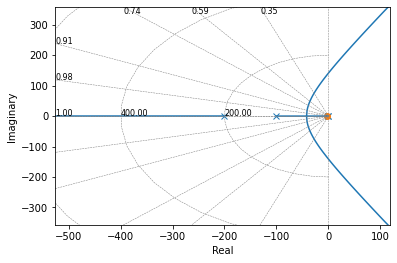

In [0]:
import numpy as np
import control as co_general
import matplotlib.pyplot as plt
import control.matlab as co
# Escolher essa opcao para o plot interativo do LR em janela fora do notebook
%matplotlib
# Opcao para plot interativo dentro do notebook (mais dificil controlar o zoom)
#%matplotlib notebook 
# Lugar das raizes sem interacao
#%matplotlib inline         

# Fecha todas as janelas
plt.close('all')
#
# Controle da posicao angular do motor eletrico CC
# Testes com controle PID
#
# Definicao dos valores dos parametros do sistema
#
# Constante do potenciometro
Kpot = 0.318;
# Parametros da funcao de transferencia Gp(s)
K1 = 100;
Km = 2.083;
Kg = 0.1;
a  = 100;
am = 1.71;
#
# Funcao de transferencia da posicao angular do sistema
s = co.tf('s');
Gp = (K1*Km*Kg)/(s*(s+a)*(s+am))
# Polos e zeros de Gtheta(s)
print('Polos da planta Gtheta(s) = ', co.pole(Gp))
print('Zeros da planta Gtheta(s) = ', co.zero(Gp))
# Definicao do controlador PD com Filtro
# Kp inicialmente vale 1 pois era selecionado pelo LR
# Controlador PD com filtro
Td=0.5
N=100
H1 = 1*(1+Td*s/(Td*s/N+1))
Hp = Kpot*H1
# Funcao de Transferencia de Malha Aberta
GHp=Gp*Hp
[rlist,klist]=co.rlocus(GHp,Plot=True,grid=True)

# Script para o ítem 6: Controlador PD- Controle de posição - Resumo do Projeto

In [0]:
# Python packages
import numpy as np
import control as co_general
import control.matlab as co
import matplotlib.pyplot as plt
%matplotlib inline
#
# Controle da posicao angular do motor eletrico CC
# Controle de Posicao Angular com controlador PID
#
# Definicao dos valores dos parametros do sistema
# Constante do potenciometro
Kpot = 0.318;
# Parametros da funcao de transferencia Gp(s)
K1 = 100;
Km = 2.083;
Kg = 0.1;
a  = 100;
am = 1.71;
# Funcao de transferencia da posicao angular do sistema Gp(s)
# Definicao de s como funcao de transferencia
s = co.tf('s');
Gp = (K1*Km*Kg)/(s*(s+a)*(s+am))
print('-------------')
print('FT da planta Gp(s) = ')
print(Gp)
# Setar o ganho obtido pelo LR
Kp = 63
Td = 0.5
N  = 100
# Controlador PD com filtro
H1 = Kp*(1+Td*s/(Td*s/N+1))
# Controlador Hp(s)
Hp = Kpot*H1
# Malha aberta
GHp=Gp*Hp
print('-------------')
print('FT DE MALHA ABERTA GHp(s)=Gp(s)*Hp(s) = ')
print(GHp)
print('-------------')
print('POLOS E ZEROS DE MALHA ABERTA')
print('Polos de GHp(s) = ', co.pole(GHp))
print('Zeros de GHp(s) = ', co.zero(GHp))
# Funcao de transferencia em malha fechada
cloop = co.feedback(GHp,1)
print('-------------')
print('FT DE MALHA FECHADA GHp(s)/(1+GHp(s))')
print(cloop)
print('-------------')
print('POLOS E ZEROS DE MALHA FECHADA')
print('Polos da planta cloop(s) =  GHp(s)/(1+GHp(s)) = ', co.pole(cloop))
print('Zeros da planta cloop(s) =  GHp(s)/(1+GHp(s)) = ', co.zero(cloop))
print('-------------')
print('COEF. DE AMORTECIMENTO E FREQ. NATURAL')
print('_____Polos____________zeta_______omegan')
co.damp(cloop)
# Calcula as caracteristicas da resposta transitoria
#  stepinfo(sys, T=None, SettlingTimeThreshold=0.02, RiseTimeLimits=(0.1,0.9))
#  S: a dictionary containing:
#        RiseTime: Time from 10% to 90% of the steady-state value.
#        SettlingTime: Time to enter inside a default error of 2%
#        SettlingMin: Minimum value after RiseTime
#        SettlingMax: Maximum value after RiseTime
#        Overshoot: Percentage of the Peak relative to steady value
#        Undershoot: Percentage of undershoot
#        Peak: Absolute peak value
#        PeakTime: time of the Peak
#        SteadyStateValue: Steady-state value
S=co.stepinfo(cloop)
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA')
print('tempo de subida tr = ','%.2f' % S['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % S['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',S['Overshoot'])
print('valor de pico thetaomax = ','%.2f' % S['Peak'])
print('instante de pico tp = ','%.2f' % S['PeakTime'],'seg')
print('valor de regime estacionario thetaoss = ','%.2f' % S['SteadyStateValue'])
# Grafico da resposta a degrau unitario
plt.figure(3)
thetao, t = co.step(cloop)
plt.plot(t,thetao)
plt.title('Resposta a degrau do sistema em malha fechada')
plt.xlabel('tempo (s)')
plt.ylabel('posicao angular')
plt.grid()
#
# Esforco de controle
#
# Funcao de transferencia para calculo do esforco de controle u(t)
# o sinal u(t) pode ser calculado definindo-se
# um sistema de controle em malha fechada onde H(s)
# esta na malha direta e G(s) na malha de realimentacao
#
# R(s)  E(s)|------|        U(s)
#---->(+)---| H(s) |------------>
#    _ ^    |------|    |
#      |                |
#      |    |------|    |
#      |----| G(s) |<----
#           |------|
# 
esforco=co.feedback(Hp,Gp)
print('-------------')
print('FT DO ESFORCO DE CONTROLE Hp(s)/(1+Hp(s)Gp(s))')
print(esforco)
# Caracteristicas da resposta transitória
SE=co.stepinfo(esforco)
# Valor de pico
print('-------------')
print('CARACTERISTICAS DO ESFORCO DE CONTROLE')
print('valor de pico Vpmax = ','%.2f' % SE['Peak'])
plt.figure(4)
Vp, te = co.step(esforco)
plt.plot(te, Vp)
plt.title('Características do esforço de controle')
plt.xlabel('tempo (s)')
plt.ylabel('esforco de controle Vp(t)')
plt.grid()
plt.show()